In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import signal
from astropy.io import fits
from sklearn.decomposition import FastICA
from skimage.metrics import structural_similarity as ssim
from scipy.stats import pearsonr
import cv2

In [3]:
in_path_fg = "./FastICA_Data/"
in_path_cs = "./FastICA_Data/"

output_path = "./FastICA_Data/"
fname_all = "test_filename"


fname_foreground = "foregrounds_total_SNR"
fname_cs = "observer_lightcone"
fname_noise = "noise_108.000MHz_210.300MHz_SKA_SKA_central_area_EOR0_0128_3.0_1000h_K"


indata_fg = fits.getdata(in_path_fg+fname_foreground+'.fits')

indata_cs = fits.getdata(in_path_cs+fname_cs+'.fits')
indata_cs = indata_cs/1000 # 21cmFAST are in mK by default, convert to K

indata_noise = fits.getdata(in_path_cs+fname_noise+'.fits')
indata_noise = indata_noise[:316, :, :]
arr = np.zeros((316,150,150))
for i in range(316):
    arr[i,:,:] = cv2.resize((indata_noise[i,:,:]-np.min(indata_noise[i,:,:])), (150, 150))+np.min(indata_noise[i,:,:])



indata_fg = indata_fg.transpose(2, 0, 1)
indata_cs = indata_cs.transpose(2, 0, 1)
indata_noise = arr
    

sh = indata_fg.shape
print(sh)
print(np.shape(arr))

(316, 150, 150)
(316, 150, 150)


In [7]:
np.max(indata_fg)

8214.17765087008

In [4]:
ncomp = 4

indata = indata_fg + indata_cs + indata_noise

sh = indata.shape
print(sh)
X = np.reshape(indata,(sh[0], sh[1]*sh[2]))

ica1 = FastICA(n_components=ncomp)
model1 = []
S = ica1.fit_transform(X.T)  # Reconstruct signals
A = ica1.mixing_  # Get estimated mixing matrix

model1 = np.reshape(np.matmul(A,S.T),(sh[0], sh[1],sh[2]))

res =  indata-model1


rec =  indata-res

(316, 150, 150)


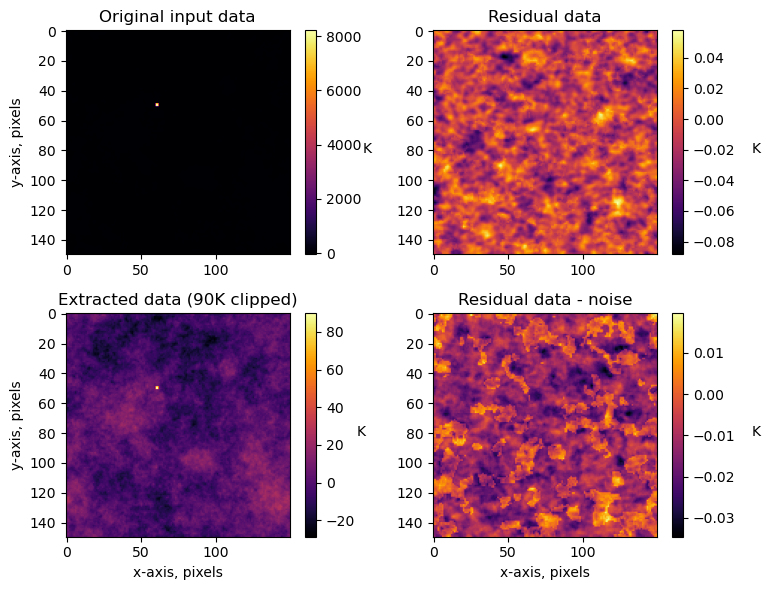

In [25]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(indata[0], cmap='inferno')
plt.title('Original input data')
cbar = plt.colorbar()
cbar.set_label('K', rotation=0)
plt.ylabel('y-axis, pixels')

plt.subplot(222)
plt.imshow(res[0], cmap='inferno')
plt.title('Residual data')
cbar = plt.colorbar()
cbar.set_label('K', rotation=0, labelpad=15)

plt.subplot(223)
plt.imshow(np.clip(model1[0], -90, 90), cmap='inferno')
plt.title(f'Extracted data (90K clipped)')
cbar = plt.colorbar()
cbar.set_label('K', rotation=0)
plt.xlabel('x-axis, pixels')
plt.ylabel('y-axis, pixels')

plt.subplot(224)
plt.imshow(res[0]-indata_noise[0], cmap='inferno')
plt.title('Residual data - noise')
cbar = plt.colorbar()
cbar.set_label('K', rotation=0, labelpad=15)
plt.xlabel('x-axis, pixels')

plt.tight_layout()

In [36]:
in_path_fg = "./FastICA_Data/"
in_path_cs = "./FastICA_Data/"

output_path = "./FastICA_Data/"
fname_all = "test_filename"


fname_foreground1 = "foregrounds_total"
fname_cs1 = "observer_lightcone"
fname_noise1 = "noise_108.000MHz_210.300MHz_SKA_SKA_central_area_EOR0_0128_3.0_1000h_K"


indata_fg1 = fits.getdata(in_path_fg+fname_foreground1+'.fits')

indata_cs1 = fits.getdata(in_path_cs+fname_cs1+'.fits')
indata_cs1 = indata_cs1/1000 # 21cmFAST are in mK by default, convert to K

indata_noise1 = fits.getdata(in_path_cs+fname_noise1+'.fits')
indata_noise1 = indata_noise1[:316, :, :]
arr1 = np.zeros((316,150,150))
for i in range(316):
    arr1[i,:,:] = cv2.resize((indata_noise1[i,:,:]-np.min(indata_noise1[i,:,:])), (150, 150))+np.min(indata_noise1[i,:,:])



indata_fg1 = indata_fg1.transpose(2, 0, 1)
indata_cs1 = indata_cs1.transpose(2, 0, 1)
indata_noise1 = arr1



ncomp = 4

indata1 = indata_fg1 + indata_cs1 + indata_noise1

sh1 = indata1.shape
print(sh1)
X1= np.reshape(indata1,(sh1[0], sh1[1]*sh1[2]))

ica11 = FastICA(n_components=ncomp)
model11 = []
S1 = ica11.fit_transform(X1.T)  # Reconstruct signals
A1 = ica11.mixing_  # Get estimated mixing matrix

model11 = np.reshape(np.matmul(A1,S1.T),(sh1[0], sh1[1],sh1[2]))

res1 =  indata1-model11


rec1 =  indata1-res1


corr, _ = pearsonr(res1[0,:,:].flatten(), res[0,:,:].flatten())

(316, 150, 150)


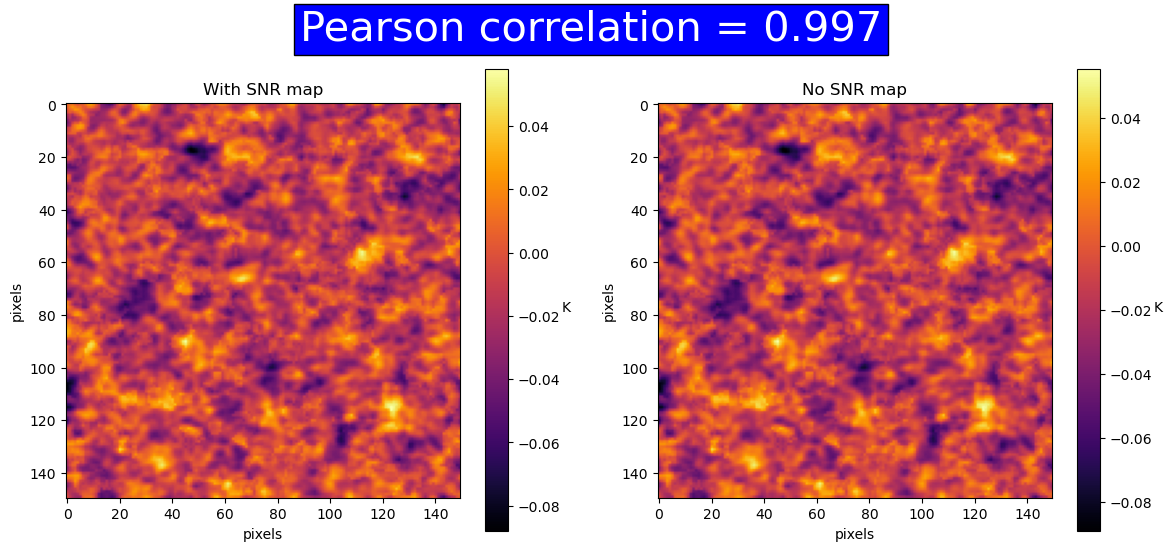

In [42]:
plt.figure(figsize=(14,6))
plt.suptitle('Pearson correlation = {}'.format(round(corr,3)), fontsize=30, color='white', 
         bbox=dict(facecolor='blue', alpha=1.0))
plt.subplot(121)
plt.title('With SNR map')
plt.imshow(res[0,:,:],cmap='inferno')
plt.ylabel('pixels')
plt.xlabel('pixels')
cbar = plt.colorbar()
cbar.set_label('K', rotation=0)
plt.subplot(122)
plt.title('No SNR map')
plt.imshow(res1[0,:,:],cmap='inferno')
plt.ylabel('pixels')
plt.xlabel('pixels')
cbar = plt.colorbar()
cbar.set_label('K', rotation=0)
plt.show()